In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [8]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [9]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)

In [10]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [11]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [61]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date)\
                            .order_by(Measurement.date.desc()).limit(1).all()[0][0]
recent_date

'2017-08-23'

0.0
0.0
0.08
0.45
2016-08-23


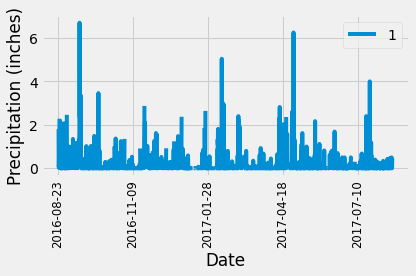

In [105]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
prcp = session.query(Measurement.date, Measurement.prcp)\
                    .filter_by(date = recent_date).all()
for p in prcp:
    print(p[1])
# Calculate the date one year from the last date in data set.
most_recent = dt.datetime.strptime(recent_date, "%Y-%m-%d")
one_year = str((most_recent-dt.timedelta(days=365)).date())
print(one_year)

# Perform a query to retrieve the data and precipitation scores
data = session.query(Measurement.date, Measurement.prcp)\
                    .filter(Measurement.date >= one_year)\
                    .filter(Measurement.date <= recent_date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(data)

# Sort the dataframe by date
sorted_df = df.sort_values(0)
sorted_df
sorted_df = sorted_df.set_index(0)

# Use Pandas Plotting with Matplotlib to plot the data
sorted_df.plot()
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)")
plt.xticks(rotation = "vertical", fontsize = 'small')
plt.tight_layout()
plt.show()




In [95]:
# Use Pandas to calcualte the summary statistics for the precipitation data
sorted_df.describe()

,1
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [106]:
# Design a query to calculate the total number stations in the dataset
no_of_stations = session.query(Station).count()
no_of_stations

9

In [113]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
stations = session.query(Measurement.station, func.count(Measurement.station))\
                        .group_by(Measurement.station)\
                        .order_by(func.count(Measurement.station).desc())\
                        .all()
stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [121]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
low = session.query(Measurement.station, func.min(Measurement.prcp))\
                    .filter_by(station = 'USC00519281').all()
high = session.query(Measurement.station, func.max(Measurement.prcp))\
                    .filter_by(station = 'USC00519281').all()
average = session.query(Measurement.station, func.avg(Measurement.prcp))\
                    .filter_by(station = 'USC00519281').all()
print(low, average, high)

[('USC00519281', 0.0)] [('USC00519281', 0.2123520923520915)] [('USC00519281', 9.64)]


Text(0, 0.5, 'Frequency')

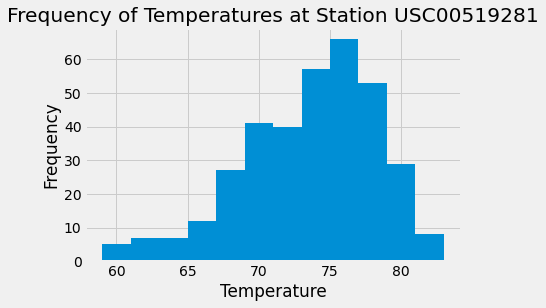

In [134]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs = session.query(Measurement.tobs)\
                    .filter(Measurement.date >= one_year)\
                    .filter(Measurement.date <= recent_date)\
                    .filter_by(station = 'USC00519281').all()
df = pd.DataFrame(tobs)
df.hist(bins=12)
plt.title("Frequency of Temperatures at Station USC00519281")
plt.xlabel("Temperature")
plt.ylabel("Frequency")

# Close session

In [ ]:
# Close Session
session.close()